# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [166]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Create two new dataframes
df_ncc = pd.read_csv(r"NorthCallCenter.csv")
df_scc = pd.read_csv(r"SouthCallCenter.csv")

# Viewing the Dataset
df_ncc.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [338]:
# Changing the max display of set rows to try to see trends such as "incoming wait time" only having nulls for all outgoing calls
pd.set_option('display.max.rows', 25)
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [168]:
# EDA Question 1A solution below:
# intializing a new variable that contains all reps within north branch and then using the len function to display now many there are
ncc_reps = df_ncc ['Rep ID'].unique()
print(len(ncc_reps))

9


#### EDA Question 1B:  How many reps are in the South branch?  

In [169]:
# EDA Question 1B solution Below:
# intializing a new variable that contains all reps within south branch and then using the len function to display now many there are
scc_reps = df_scc ['Rep ID'].unique()
print(len(scc_reps))

11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [170]:
# EDA Question 2A solution Below:
# taking the average of those 4 columns and then rounding them to two decimal places
ncc_col_avg = df_ncc[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
print(ncc_col_avg)
    

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [171]:
# EDA Question 2B solution Below:
# taking the average of those 4 columns and then rounding them to two decimal places
scc_col_avg = df_scc[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
print(scc_col_avg)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [172]:
# EDA Question 3 solution Below: 
# creating one dataframe
df = pd.concat([df_scc, df_ncc])
# counting all records after grouping them by time block
df.groupby('Time Block').count()


,Unnamed: 0,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Time Block,,,,,,,,,,,,,,
10:00 AM,99,99,99,99,99,99,99,99,99,99,99,33,99,99
11:00 AM,56,56,56,56,56,56,56,56,56,56,56,19,56,56
12:00 PM,120,120,120,120,120,120,120,120,120,120,120,43,120,120
1:00 PM,40,40,40,40,40,40,40,40,40,40,40,15,40,40
2:00 PM,65,65,65,65,65,65,65,65,65,65,65,25,65,65
3:00 PM,73,73,73,73,73,73,73,73,73,73,73,32,73,73
4:00 PM,53,53,53,53,53,53,53,53,53,53,53,22,53,53
5:00 PM,43,43,43,43,43,43,43,43,43,43,43,14,43,43
9:00 AM,10,10,10,10,10,10,10,10,10,10,10,5,10,10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [173]:
# Question 1 solution below
# Using a loop to find the percentage of all missing values per column in the data set

for col in df_scc.columns:
    pct_missing = np.mean(df_scc[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


In [174]:
for col in df_ncc.columns:
    pct_missing = np.mean(df_ncc[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))



Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: The column in both dataframes Incoming Wait Time had missing values, 67% for the north branch and 60% for the south. Because the column is intrumental to the analysis it cannot be removed, the records that do have nulls have useful info for the other columns, filling the data is not an option as it would skew one of the KPIs, so I believe the best course of action is to leave the missing data. 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [175]:
# Cleaning Question 2 solution below:
df_ncc['Sale'] = df_ncc['Sale'].str.rstrip()
df_ncc['Sale'].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: I used the str.strip method to remove the trailing spaces so there are only two unique values that are returned now from the column.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [220]:
# Cleaning Question 3 solution below:
# checking for duplicates then using unique to verify that there are only false values
df_dup = df.duplicated()
df_dup.unique()

array([False])

##### Record your answer below:
> Your Answer: There were no duplicates in the data set that I found.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [222]:
# Cleaning Question 4 solution below:
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [334]:
# dropping the column that was the same values as the index
df.drop(['Unnamed: 0'], axis=1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


##### Record your answer below:
> Your Answer: The "unnamed: 0" Column that was the same as the index was unnecessary as it was the same value as the index and I did not use it in any calculations.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [178]:
# Create dataframe for the entire company named df
df = pd.concat([df_scc, df_ncc])


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [179]:
# Manipulation Question solution below:
# grouping by rep ID then using agg to sum the columns that only contain numbers so I didnt end up with large rows of concatenated strings
scc_rep_agg_df = df_scc.groupby('Rep ID').agg('sum', numeric_only = True)
scc_rep_agg_df.sort_values('Calls', ascending=False)


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Susan,4006,2,0,267,53,35.0,88,26
Josh,3960,3,0,260,50,31.0,83,26


In [180]:
ncc_rep_agg_df = df_ncc.groupby('Rep ID').agg('sum', numeric_only = True)
ncc_rep_agg_df.sort_values('Calls', ascending=False)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Duke,2999,2,0,292,56,39.0,85,29
Joe,3178,0,0,256,49,36.0,81,26
Xander,3340,1,0,244,44,20.0,68,24
Cam,2746,1,0,233,46,32.0,66,24
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent has 37 total calls
- South Branch = Eric has 35 total calls

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [181]:
# Manipulation Question 2 solution below:
# North Branch Call Abandonment Rate
# creating the abandon rate percentage by divding the amount of calls abandoned by the sum of the calls. 
ncc_avg_call_abandon_rate = (df_ncc['Abandoned'].sum() / df_ncc['Calls'].sum()) * 100
print(ncc_avg_call_abandon_rate.round(2))

2.86


In [182]:
# South Branch Call Abandonment Rate
scc_avg_call_abandon_rate = (df_scc['Abandoned'].sum() / df_scc['Calls'].sum()) * 100
print(scc_avg_call_abandon_rate.round(2))

1.27


In [183]:
# Both Branches Call Abandonment Rate
avg_call_abandon_rate = (df['Abandoned'].sum() / df['Calls'].sum()) * 100
print(avg_call_abandon_rate.round(2))

1.97


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No they do not.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [212]:
# Manipulation Question 3 solution below:
# initalizing a variable to hold the calls that where taken in under two seconds and then counting them if they meet the boolean condition of being 
# under 2 seconds using the loc function as well as dividing that number by the overall count of the Incoming Wait Time column.
scc_calls_answered = df_scc['Incoming Wait Time'] <= 2
scc_calls_answered.value_counts()
scc_calls_percent = scc_calls_answered.loc[scc_calls_answered==True].count() /df_scc['Incoming Wait Time'].count()
print(scc_calls_answered.loc[scc_calls_answered==True].count())
print(scc_calls_percent.round(4))


48
0.381


In [213]:
ncc_calls_answered = df_ncc['Incoming Wait Time'] <= 2
ncc_calls_answered.value_counts()
ncc_calls_percent = ncc_calls_answered.loc[ncc_calls_answered==True].count() /df_ncc['Incoming Wait Time'].count()
print(ncc_calls_answered.loc[ncc_calls_answered==True].count())
print(ncc_calls_percent.round(4))



33
0.4024


In [214]:
calls_answered = df['Incoming Wait Time'] <= 2
calls_answered.value_counts()
calls_percent = calls_answered.loc[calls_answered==True].count() /df['Incoming Wait Time'].count()
print(calls_answered.loc[calls_answered==True].count())
print(calls_percent.round(4))

81
0.3894


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24% and 33 Calls
- South Branch = 38.10% and 48 Calls 
- Company Wide = 38.94% and 81 Calls

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [215]:
# Manipulation Question 4 solution below: 
# taking the average of the Incoming Wait Time column and then rounding it to two decimals
df_ncc['Incoming Wait Time'].mean().round(2)

np.float64(3.05)

In [216]:
df_scc['Incoming Wait Time'].mean().round(2)

np.float64(3.0)

In [217]:
df['Incoming Wait Time'].mean().round(2)

np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 Seconds
- South Branch in seconds = 3 Seconds
- Company Wide in seconds = 3.02 Seconds 

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\Devin\AppData\Local\Temp\ipykernel_4048\1717177523.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


Text(0, 0.5, 'Average Abandonment Rate')

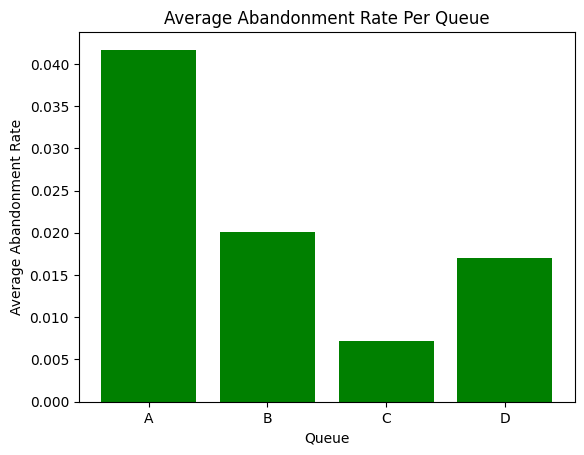

In [264]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sns
import matplotlib.pyplot as plt
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
plt.bar(range(len(abandonment_rates)), abandonment_rates.values(), align='center',color='green')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.title("Average Abandonment Rate Per Queue")
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")



##### Record your answer below:

> Chart style you chose and why: I chose a vertical bar graph since we were comparing rates between the queues I think a bar graph is the most effective way to display that. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

C:\Users\Devin\AppData\Local\Temp\ipykernel_4048\2710891912.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Service Level %", y="Rep ID", data=service_level, palette="Blues")


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

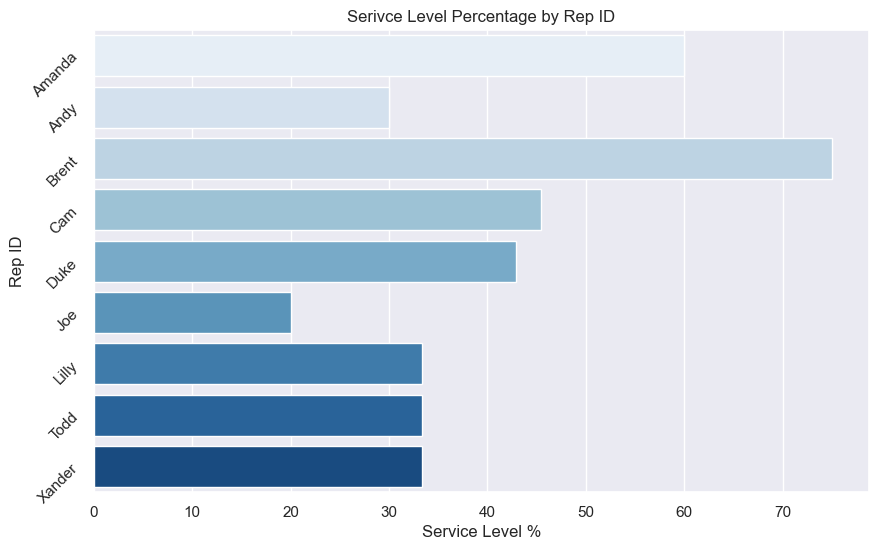

In [335]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_ncc.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_ncc[df_ncc["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_ncc[df_ncc["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x="Service Level %", y="Rep ID", data=service_level, palette="Blues")
plt.title("Serivce Level Percentage by Rep ID")
plt.xlabel("Service Level %")
plt.ylabel("Rep ID")
plt.yticks(rotation=45)
plt.tight_layout

C:\Users\Devin\AppData\Local\Temp\ipykernel_4048\1718362696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rep ID', y='Incoming Wait Time', data=north_plt, palette='inferno')


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

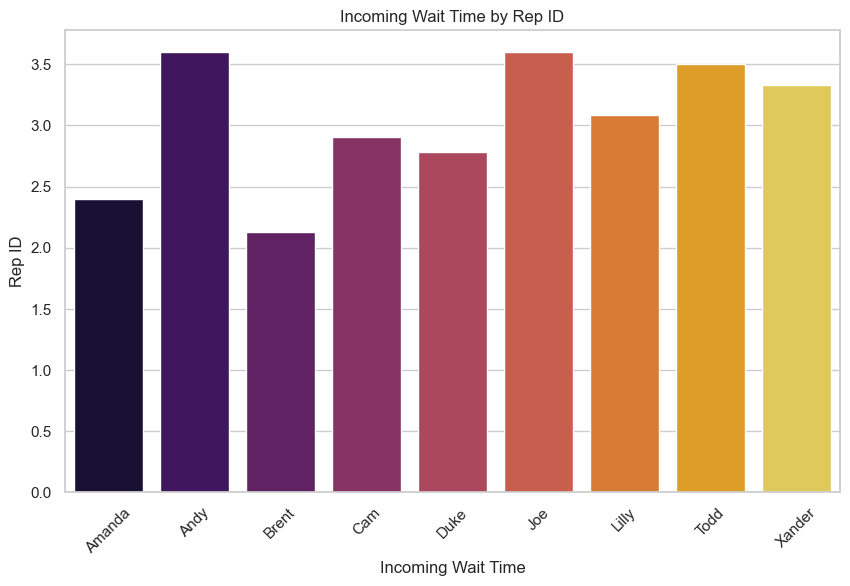

In [328]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Rep ID', y='Incoming Wait Time', data=north_plt, palette='inferno')
plt.title("Incoming Wait Time by Rep ID")
plt.xlabel("Incoming Wait Time")
plt.ylabel("Rep ID")
plt.xticks(rotation=45)
plt.tight_layout

##### Record your answer below:

> Chart style you chose and why: I decided that mapping both service level and incoming wait time would look better on two horizontal bar graphs, I stayed with bar graphs because both of these where also comparing 2 variables. For comparison of Representatives I feel like the bar graph is a simple but effective way to display the differeces between them.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Complaint'),
  Text(1, 0, 'Product Support'),
  Text(2, 0, 'Sales Support')])

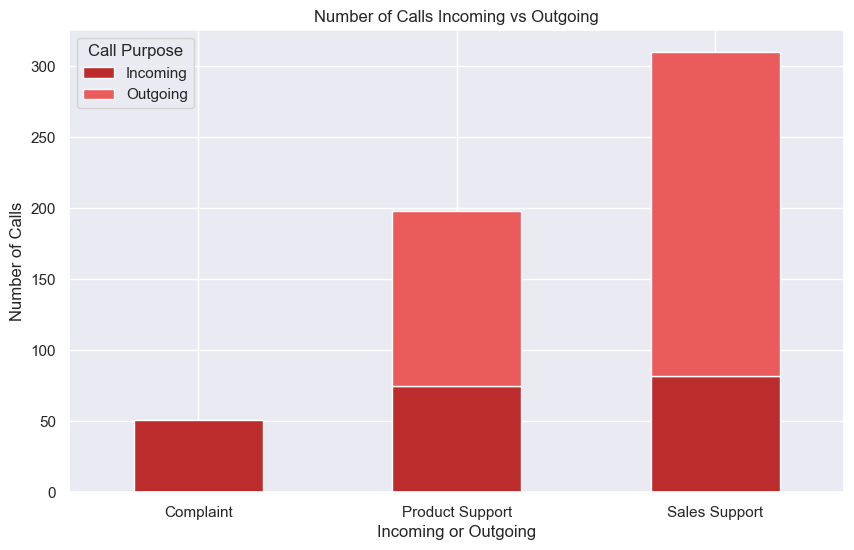

In [330]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
df2 = {'Incoming' :[complaints.get('Incoming', 0), 
                    sales_support.get('Incoming', 0), 
                    product_support.get('Incoming',0)],
       'Outgoing' :[complaints.get('Outgoing', 0),
                    sales_support.get('Outgoing', 0),
                    product_support.get('Outgoing', 0)]}
                    
       
df_stacked = pd.DataFrame(df2, index=call_purpose)
sns.set(style='darkgrid')
df_stacked.plot(kind='bar', stacked=True, figsize=(10,6), color=["#BC2C2C", "#EA5C5C"])
plt.xlabel('Incoming or Outgoing')
plt.ylabel('Number of Calls')
plt.title('Number of Calls Incoming vs Outgoing')
plt.legend(title='Call Purpose')
plt.xticks(rotation = 0)

##### Record your answer below:

> Chart style you chose and why: For the last graph I chose a stacked column chart to display both the composition and the comparsion of variables. I felt this to be an adequate way to show both how many incoming vs outgoing calls compared to the total as well as the different purposes that calls where being received

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The south branch is unquestionably working with better efficiency south branches call abandonment rate is lower at 1.27% compared to 2.86%, south branch also handles a much larger portion of the calls despite only having 2 more reps than north branch, south branch taking 314 calls compared to 245 for north. South branch also has a lower incoming wait time at 3.00 compared to 3.05.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: I mentioned the volume difference in the question above, South branch is working much faster and has a lower abandonment rate as well. North branch would beneift more from extra help, that being said if there where to hire 5 more additional reps adding 1 or 2 more to south branch would likely benefit the company goal of lowering Incoming Wait Time to 2 seconds.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I think having average call duration could of been helpful as it would of given insight into how time was being used and how effective the current number of reps was at handling the workload that they are being given.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [339]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: